# Rabinovich-Fabrikant equations

The Rabinovich–Fabrikant equations are a set of three coupled ordinary differential equations exhibiting chaotic behaviour for certain values of the parameters. They are named after Mikhail Rabinovich and Anatoly Fabrikant, who described them in 1979.

$$
\begin{aligned}
&\dot{x}=y\left(z-1+x^{2}\right)+\gamma x \\
&\dot{y}=x\left(3 z+1-x^{2}\right)+\gamma y \\
&\dot{z}=-2 z(\alpha+x y)
\end{aligned}
$$

where $\alpha, \gamma$ are constants that control the evolution of the system. 

- https://zh.wikipedia.org/wiki/拉比诺维奇-法布里康特方程
- https://en.wikipedia.org/wiki/Rabinovich%E2%80%93Fabrikant_equations

In [1]:
import brainpy as bp
import matplotlib.pyplot as plt

In [2]:
@bp.odeint(method='rk4')
def rf_eqs(x, y, z, t, alpha=1.1, gamma=0.803):
    dx = y *(z-1+x*x) + gamma *x
    dy = x *(3*z+1-x*x) + gamma *y
    dz = -2*z*(alpha+x*y)
    return dx, dy, dz

In [3]:
def run_and_visualize(runner, duration=100, dim=3):
  assert dim in [3, 2]
  runner.run(duration)

  if dim == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(runner.mon.x.shape[1]):
      plt.plot(runner.mon.x[100:, i], runner.mon.y[100:, i], runner.mon.z[100:, i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
  else:
    for i in range(runner.mon.x.shape[1]):
      plt.plot(runner.mon.x[100:, i], runner.mon.y[100:, i])
    plt.xlabel('x')
    plt.xlabel('y')
  plt.show()

  0%|          | 0/100000 [00:00<?, ?it/s]

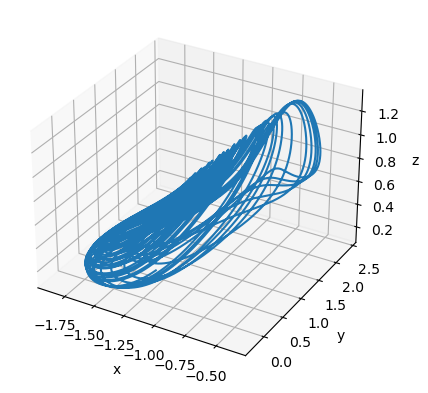

In [4]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=1.1, gamma=0.87),
                             dt=0.001)
run_and_visualize(runner, 100)

  0%|          | 0/100000 [00:00<?, ?it/s]

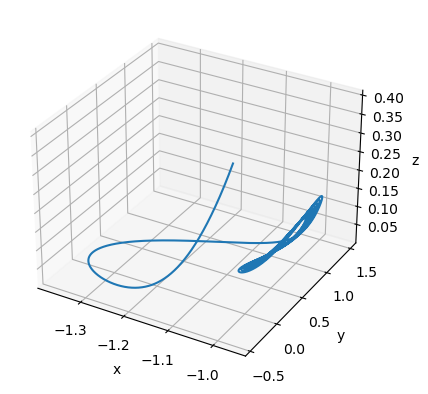

In [5]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=0.98, gamma=0.1),
                             dt=0.001)
run_and_visualize(runner, 100)

  0%|          | 0/300000 [00:00<?, ?it/s]

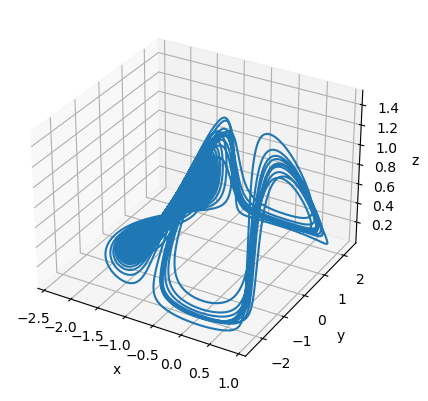

In [6]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=0.14, gamma=0.1),
                             dt=0.001)
run_and_visualize(runner, 300)

  0%|          | 0/50000 [00:00<?, ?it/s]

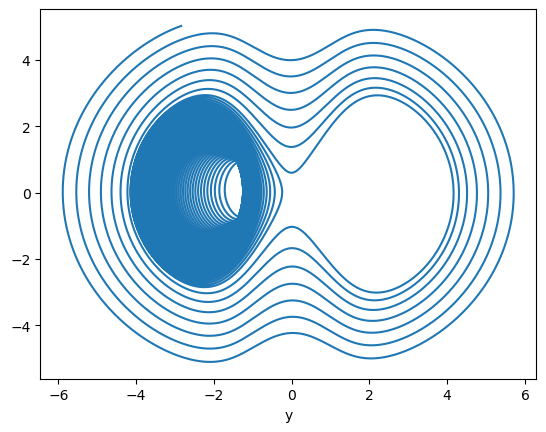

In [7]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=0.05, gamma=0.1),
                             dt=0.001)
run_and_visualize(runner, 50, dim=2)

  0%|          | 0/100000 [00:00<?, ?it/s]

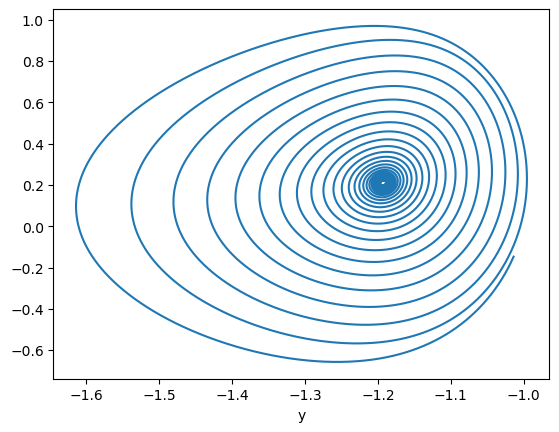

In [8]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=0.25, gamma=0.1),
                             dt=0.001)
run_and_visualize(runner, 100, dim=2)

  0%|          | 0/100000 [00:00<?, ?it/s]

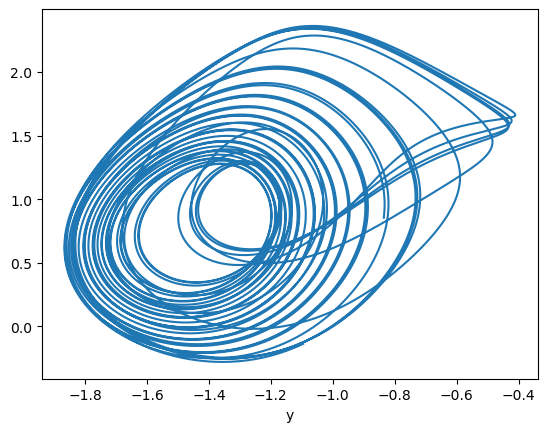

  0%|          | 0/100000 [00:00<?, ?it/s]

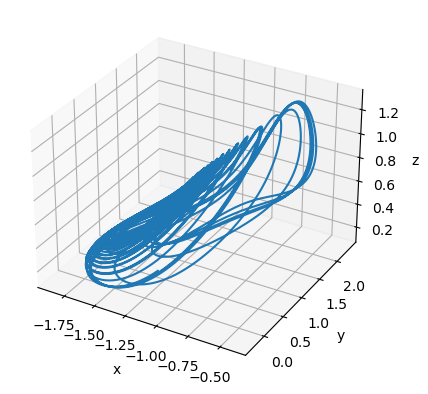

In [9]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=1.1, gamma=0.86666666666666666667),
                             dt=0.001)
run_and_visualize(runner, 100, dim=2)

runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=-1, y=0, z=0.5), 
                             args=dict(alpha=1.1, gamma=0.86666666666666666667),
                             dt=0.001)
run_and_visualize(runner, 100, dim=3)

  0%|          | 0/60000 [00:00<?, ?it/s]

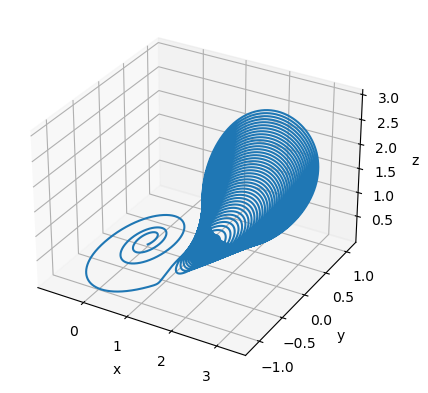

In [10]:
runner = bp.IntegratorRunner(rf_eqs, monitors=['x', 'y', 'z'],
                             inits=dict(x=0.1, y=-0.1, z=0.1), 
                             args=dict(alpha=0.05, gamma=0.1),
                             dt=0.001)
run_and_visualize(runner, 60, dim=3)